#  Traffic Sign Classification 

In [8]:
import os
import cv2
import numpy as np

IMG_SIZE = 64

def load_dataset(path):
    """Loads dataset from subfolders (for TRAIN)."""
    images, labels = [], []
    for class_id in sorted(os.listdir(path)):
        class_folder = os.path.join(path, class_id)
        if not os.path.isdir(class_folder):
            continue
        for file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, file)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img)
            labels.append(int(class_id))
    return np.array(images)/255.0, np.array(labels)


def load_test_flat(path):
    """Loads dataset from a single folder with NO subfolders (for TEST)."""
    images = []
    labels = []  # no labels available
    for file in os.listdir(path):
        img_path = os.path.join(path, file)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        images.append(img)
        labels.append(-1)  # dummy label
    return np.array(images)/255.0, np.array(labels)


# ✅ Define your dataset paths
train_path = r"traffic_Data/DATA"
test_path  = r"traffic_Data/TEST"

# ✅ Load data
train_x, train_y = load_dataset(train_path)
test_x, test_y   = load_test_flat(test_path)

print("Training data:", train_x.shape, train_y.shape)
print("Testing data:", test_x.shape, test_y.shape)


Training data: (4170, 64, 64, 3) (4170,)
Testing data: (1994, 64, 64, 3) (1994,)


In [9]:
# ✅ Build CNN model
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(len(class_names),activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\ESHA\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 58)             │         7,482 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 690,682 (2.63 MB)

 Trainable params: 690,682 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from sklearn.model_selection import train_test_split

train_x2, val_x2, train_y2, val_y2 = train_test_split(
    train_x, train_y, test_size=0.2, random_state=42
)

history = model.fit(
    train_x2, train_y2,
    epochs=10,
    validation_data=(val_x2, val_y2)
)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.7833 - loss: 0.8254 - val_accuracy: 0.8657 - val_loss: 0.5035
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.8885 - loss: 0.3985 - val_accuracy: 0.9077 - val_loss: 0.3309
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.9388 - loss: 0.2073 - val_accuracy: 0.9269 - val_loss: 0.2095
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9595 - loss: 0.1349 - val_accuracy: 0.9676 - val_loss: 0.1033
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9721 - loss: 0.1103 - val_accuracy: 0.9724 - val_loss: 0.0792
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.9892 - loss: 0.0408 - val_accuracy: 0.9892 - val_loss: 0.0419
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9958 - loss: 0.0180 - val_accuracy: 0.9808 - val_loss: 0.0827
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9949 - loss: 0.0287 - val_ac

In [28]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_image(path):
    # ✅ 1. Check if file exists
    if not os.path.exists(path):
        print(f"❌ File not found: {path}")
        return
    
    # ✅ 2. Load image
    img = cv2.imread(path)
    if img is None:
        print("❌ Cannot load image (corrupted or unsupported format).")
        return

    # ✅ 3. Convert + preprocess
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE)) / 255.0

    # ✅ 4. Predict class
    pred = model.predict(np.expand_dims(img_resized, axis=0))
    cls = np.argmax(pred)

    # ✅ 5. Get class name from labels.csv
    class_name = class_names.get(cls, "Unknown")

    # ✅ 6. Show result
    plt.imshow(img_rgb)
    plt.title(f"Prediction: {class_name}")
    plt.axis("off")
    plt.show()

    print(f"✅ Predicted Class ID: {cls}")
    print(f"✅ Class Name: {class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


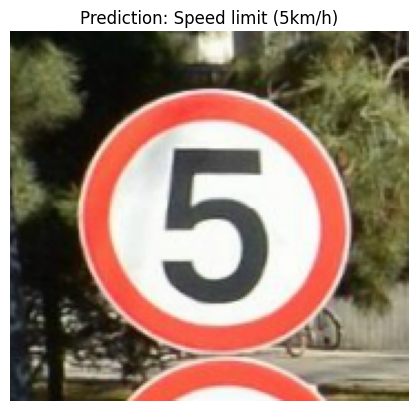

✅ Predicted Class ID: 0
✅ Class Name: Speed limit (5km/h)


In [33]:
predict_image(r"./traffic_Data/TEST/000_1_0005_1_j.png")

In [34]:
!pip install gradio


  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata (9.7 kB)
   ---------------------------------------- 0.0/63.5 MB ? eta -:--:--
   ---------------------------------------- 0.8/63.5 MB 7.3 MB/s eta 0:00:09
   ---------------------------------------- 0.8/63.5 MB 7.3 MB/s eta 0:00:09
   -- ------------------------------------- 3.7/63.5 MB 5.9 MB/s eta 0:00:11
   ---- ----------------------------------- 7.1/63.5 MB 8.9 MB/s eta 0:00:07
   ------ --------------------------------- 10.0/63.5 MB 9.9 MB/s eta 0:00:06
   ------ --------------------------------- 10.5/63.5 MB 10.0 MB/s eta 0:00:06
   ------ --------------------------------- 10.5/63.5 MB 10.0 MB/s eta 0:00:06
   ------ --------------------------------- 10.5/63.5 MB 10.0 MB/s eta 0:00:06
   ------ --------------------------------- 10.5/63.5 MB 10.0 MB/s eta 0:00:06
   ------- -------------------------------- 11.8/63.5 MB 5.7 MB/s eta 0:00:10
   --------- ------------------------------ 15.5/63.5 MB 6.8 MB/s eta 0:


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import gradio as gr
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Make sure your model and class_names are already loaded
# model = your trained CNN
# class_names = labels_df.set_index('ClassId')['Name'].to_dict()

IMG_SIZE = 64

def predict_from_ui(img):
    """Takes an uploaded image, predicts its traffic sign class."""
    # Convert from PIL to OpenCV format
    img = np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0

    # Model prediction
    pred = model.predict(np.expand_dims(img_resized, axis=0))
    cls = np.argmax(pred)
    class_name = class_names.get(cls, "Unknown")

    return {class_name: float(pred[0][cls])}


In [36]:
interface = gr.Interface(
    fn=predict_from_ui,
    inputs=gr.Image(type="pil", label="Upload a Traffic Sign Image"),
    outputs=gr.Label(num_top_classes=3, label="Top Predictions"),
    title="🚦 Traffic Sign Classifier",
    description="Upload a traffic sign image to predict its class using your trained CNN model."
)


In [ ]:
interface.launch(share=True)


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://63de61a59261e53c55.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
